In [6]:
import wfdb
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [7]:
# Cargar los datos 0379_002_019_ECG de PhysioNet
record_name = "0427_002_017_ECG"          
db_dir      = "i-care/2.0/training/0427"  
rec = wfdb.rdrecord(record_name, pn_dir=db_dir)

In [ ]:
# --- Lista de todos los metadatos -------------------------------------------------
metadata = vars(rec)
df = pd.DataFrame(
    list(metadata.items()),
    columns=['Field', 'Value']
)

print(df)

              Field                                              Value
0       record_name                                   0427_002_017_ECG
1             n_sig                                                  1
2                fs                                                500
3      counter_freq                                               None
4      base_counter                                               None
5           sig_len                                            1800000
6         base_time                                               None
7         base_date                                               None
8          comments  [Utility frequency: 50, Start time: 17:00:00, ...
9          sig_name                                              [ECG]
10         p_signal  [[-88.56345602434781], [-110.77015015136466], ...
11         d_signal                                               None
12       e_p_signal                                               None
13    

In [9]:
# --- Metadatos -------------------------------------------------
print(f"Frecuencia de muestreo: {rec.fs} Hz")
print(f"Canales disponibles: {rec.sig_name}")
print(rec.comments)

Frecuencia de muestreo: 500 Hz
Canales disponibles: ['ECG']
['Utility frequency: 50', 'Start time: 17:00:00', 'End time: 17:59:59']


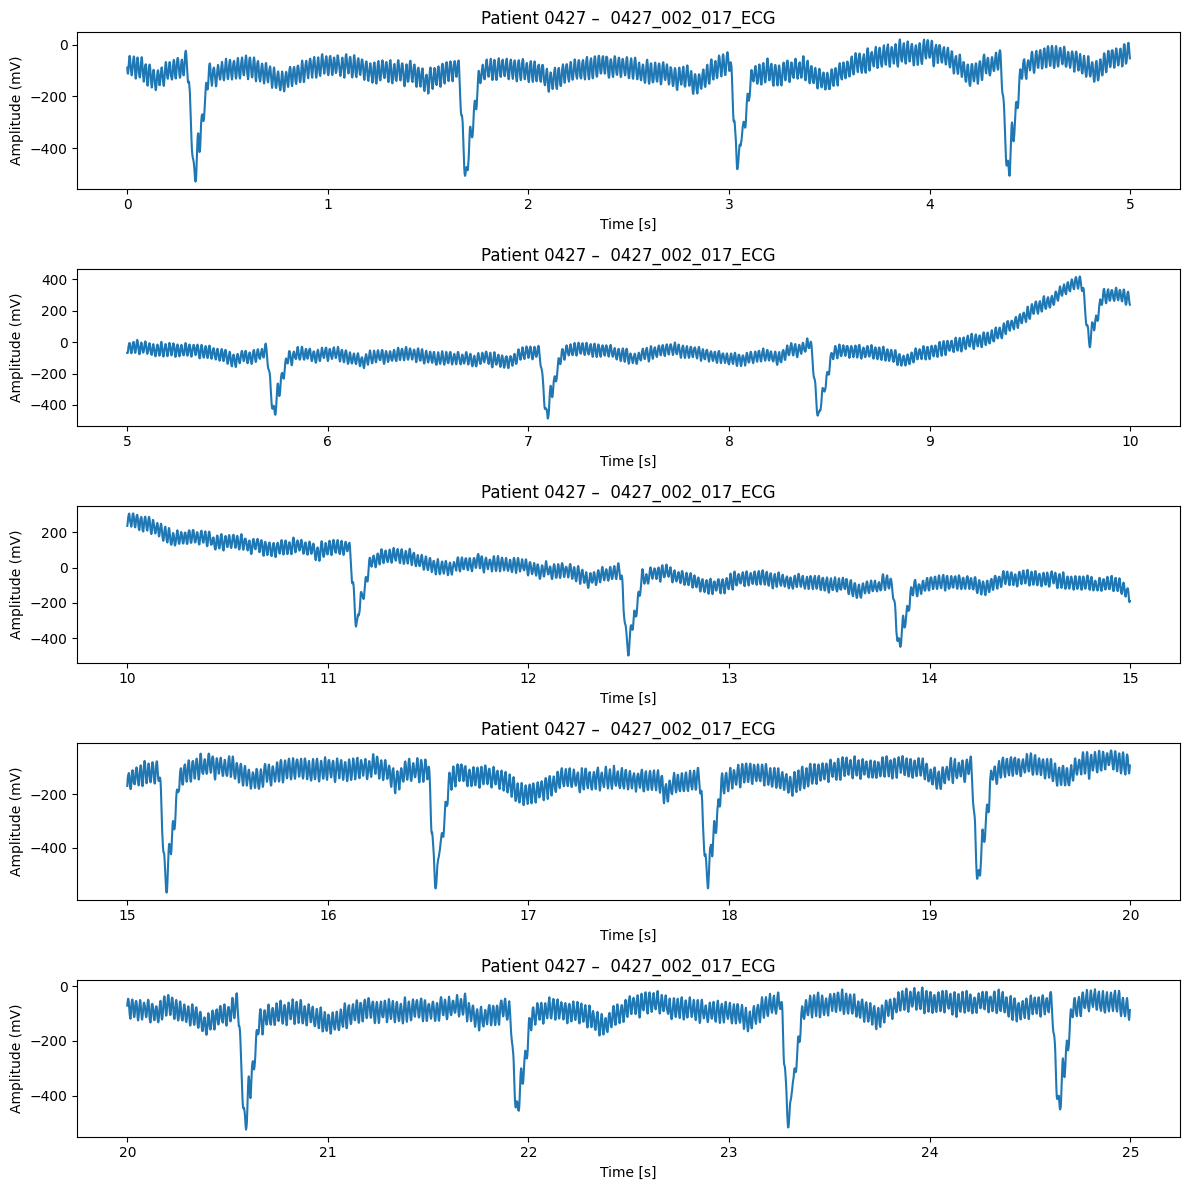

In [10]:

# Extaer senal ECG 
ecg = rec.p_signal[:, 0]
fs = rec.fs  # Frecuencia de muestreo
# Vector de tiempo            
t   = np.arange(ecg.size) / fs


#Graficar senal ECG
plt.figure(figsize=(12,12))
seconds_to_plot = 5
samples         = int(seconds_to_plot * rec.fs)

for i in range(5):
    plt.subplot(5, 1, i + 1)
    plt.plot(t[samples*i:(i+1)*samples], ecg[samples*i:(i+1)*samples])
    plt.title(f"Patient 0427 –  {record_name}")
    plt.xlabel("Time [s]")
    plt.ylabel("Amplitude (mV)")
    
plt.tight_layout()
plt.show()

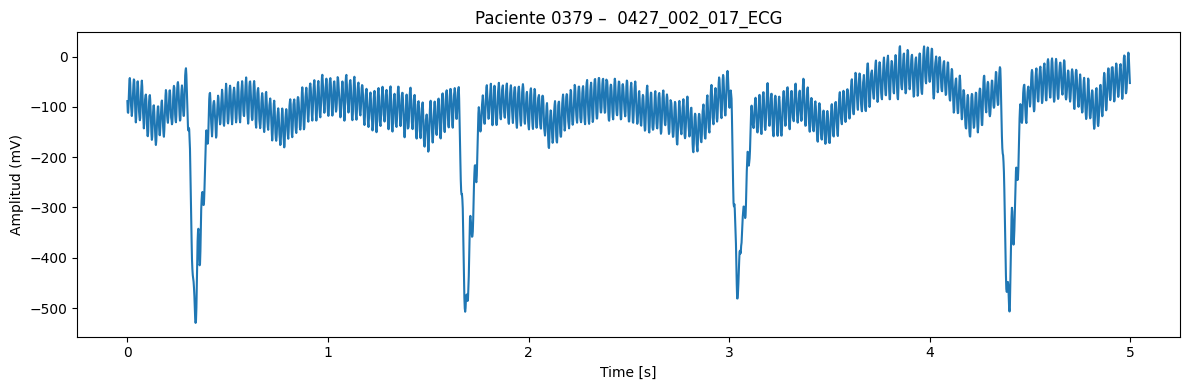

In [11]:
# Extaer senal ECG 
ecg = rec.p_signal[:, 0] 
# Vector de tiempo        
t   = np.arange(ecg.size) / rec.fs


#Graficar senal ECG
plt.figure(figsize=(12,4))
seconds_to_plot = 5
samples         = int(seconds_to_plot * rec.fs)

plt.plot(t[:samples], ecg[:samples])
plt.title(f"Paciente 0379 –  {record_name}")
plt.xlabel("Time [s]")
plt.ylabel("Amplitud (mV)")
plt.tight_layout()
plt.show()